## Importation des Biblioth√®ques  

L'importation des bibliotheques va permettre de :  

1. **numpy** : Effectuer des calculs math√©matiques sur les donn√©es, comme la normalisation des valeurs pour que les mod√®les fonctionnent mieux.  

2. **pandas** : Charger le fichier CSV contenant les informations des patients et organiser ces donn√©es sous forme de tableau pour les analyser plus facilement.  

3. **matplotlib.pyplot** : Cr√©er des graphiques pour mieux comprendre les tendances des donn√©es, par exemple en visualisant la r√©partition des cas b√©nins et malins.  

4. **seaborn** : Faire des graphiques plus d√©taill√©s, comme une carte de chaleur montrant quelles caract√©ristiques influencent le plus le diagnostic du cancer.  


In [36]:
import numpy as np  # Pour les op√©rations sur les tableaux
import matplotlib.pyplot as plt  # Pour la cr√©ation de graphiques
import seaborn as sns  # Pour des visualisations statistiques avanc√©es
import pandas as pd  # Pour la manipulation et l'analyse de donn√©es
import warnings
warnings.filterwarnings('ignore')

## Chargement des donn√©es  

### Pourquoi ?  
Le chargement des donn√©es permet d‚Äôimporter le fichier `breast-cancer.csv`, qui contient des informations sur les patients atteints du cancer du sein.  

### Ce que contient le fichier :  
- **ID du patient** : Un identifiant unique.  
- **Diagnostic** : Indique si la tumeur est b√©nigne (`B`) ou maligne (`M`).  
- **Caract√©ristiques des cellules** : Plusieurs mesures (taille, texture, p√©rim√®tre, etc.) permettant d‚Äôanalyser la nature de la tumeur.  

### Objectif  
Charger ces donn√©es dans un **DataFrame** pour pouvoir les analyser, les nettoyer et les utiliser dans la suite du projet.  


In [57]:
# Chargement des donn√©es √† partir d'un fichier CSV
df = pd.read_csv("breast-canser.csv") # Fichier contenant les donn√©es sur le cancer du sein

## Affichage des premi√®res lignes du DataFrame  

### Pourquoi ?  
Cette √©tape permet d‚Äôobtenir un **aper√ßu rapide des donn√©es** en affichant les premi√®res lignes du tableau. Cela aide √† :  
- V√©rifier la structure du jeu de donn√©es (colonnes, types de valeurs).  
- Identifier d‚Äô√©ventuelles valeurs manquantes ou incoh√©rentes.  
- Comprendre les caract√©ristiques principales avant toute analyse approfondie.  



In [58]:
df.head()  # Affiche les 5 premi√®res lignes du DataFrame

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

## Pr√©traitement des donn√©es  

### V√©rification des valeurs uniques dans la colonne `diagnosis`  

### Pourquoi ?  
Cette √©tape permet de **v√©rifier les diff√©rentes cat√©gories** pr√©sentes dans la colonne `diagnosis`. Cela aide √† :  
- S'assurer que seules deux classes existent (`B` pour b√©nin et `M` pour malin).  
- D√©tecter d‚Äô√©ventuelles erreurs ou valeurs inattendues.  
- Pr√©parer les donn√©es pour l'√©tape de mod√©lisation.  




In [59]:
df.diagnosis.unique() # Affiche les valeurs uniques de la colonne 'diagnosis'

array(['M', 'B'], dtype=object)

## Signification des valeurs dans la colonne `diagnosis`  

- **M ‚Üí Maligne** : La tumeur est canc√©reuse.  
- **B ‚Üí B√©nigne** : La tumeur n'est pas canc√©reuse.  

Ces informations sont essentielles pour bien interpr√©ter les r√©sultats du mod√®le et analyser la distribution des diagnostics.  


## Statistiques descriptives des donn√©es  

### Pourquoi ?  
La commande `df.describe()` permet d'obtenir un **r√©sum√© statistique** des donn√©es num√©riques. Cela aide √† :  
- Comprendre la distribution des valeurs pour chaque colonne.  
- Identifier d'√©ventuelles valeurs aberrantes.  
- Avoir une id√©e des tendances g√©n√©rales des donn√©es.  

### Informations affich√©es :  
- **count** : Nombre total de valeurs non nulles dans chaque colonne.  
- **mean** : Moyenne des valeurs.  
- **std** : √âcart-type (dispersion des valeurs).  
- **min** : Valeur minimale.  
- **25% / 50% (m√©diane) / 75%** : Quartiles de la distribution des donn√©es.  
- **max** : Valeur maximale.  




In [60]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## Informations g√©n√©rales sur le DataFrame  

### Pourquoi ?  
La commande `df.info()` permet d‚Äôobtenir un **r√©sum√© global** du jeu de donn√©es. Elle est utile pour :  
- Conna√Ætre le **nombre total de lignes et de colonnes**.  
- V√©rifier les **types de donn√©es** de chaque colonne (num√©rique, texte, etc.).  
- Identifier la **pr√©sence de valeurs manquantes** dans les colonnes.  

### Informations affich√©es :  
- **Nombre total d‚Äôentr√©es (lignes)**.  
- **Noms des colonnes** et leur type (`int64`, `float64`, `object`...).  
- **Nombre de valeurs non nulles** dans chaque colonne.  
- **M√©moire utilis√©e** par le DataFrame.  




In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Comptage des valeurs manquantes dans chaque colonne  

### Pourquoi ?  
Cette √©tape permet d‚Äôidentifier **les colonnes contenant des valeurs manquantes**. Cela aide √† :  
- D√©terminer si un **nettoyage des donn√©es** est n√©cessaire.  
- Prendre des d√©cisions sur la gestion des valeurs manquantes (suppression, imputation‚Ä¶).  






In [62]:
df.isna().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Visualisation des valeurs manquantes dans le DataFrame  

### Pourquoi ?  
Cette √©tape permet de **visualiser les valeurs manquantes** sous forme graphique afin de :  
- Identifier rapidement les colonnes concern√©es.  
- Voir la r√©partition des donn√©es manquantes.  
- D√©cider des actions √† entreprendre (suppression, imputation‚Ä¶).  

### Outil utilis√©  
La biblioth√®que **seaborn** permet d‚Äôafficher un **diagramme des valeurs manquantes** avec `heatmap()`.  




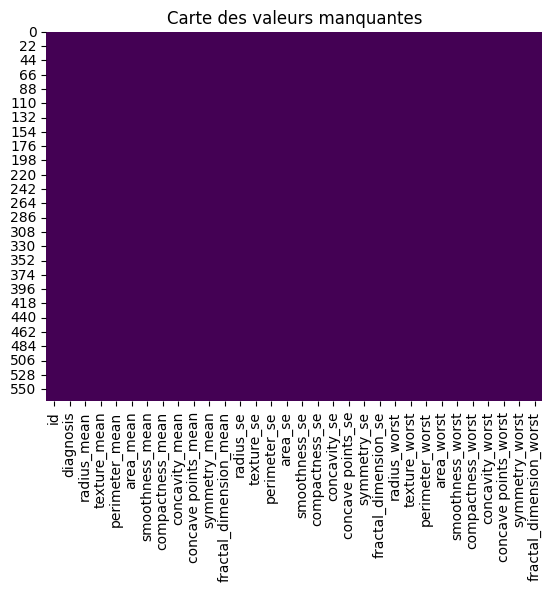

In [63]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()

## Transformation de la variable cible `diagnosis` en valeurs num√©riques  

### Pourquoi ?  
Les mod√®les de machine learning fonctionnent avec des **valeurs num√©riques**. Comme la colonne `diagnosis` contient des **valeurs textuelles** (`M` pour maligne et `B` pour b√©nigne), il faut la convertir en **valeurs binaires** :  
- **M (Maligne) ‚Üí 1**  
- **B (B√©nigne) ‚Üí 0**  

Cette transformation permet de rendre les donn√©es exploitables pour l'entra√Ænement du mod√®le.  

In [64]:
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)

## V√©rification de la transformation  

### Pourquoi ?  
Apr√®s avoir converti les valeurs `M` et `B` en `1` et `0`, il est important de v√©rifier si la transformation a √©t√© appliqu√©e correctement.  




In [65]:
df["diagnosis"].unique()

array([1, 0])

# üìä Analyse Exploratoire de Donn√©es (EDA)

## üéØ Objectif  
L‚Äôanalyse exploratoire de donn√©es (**EDA - Exploratory Data Analysis**) permet de mieux comprendre les caract√©ristiques du jeu de donn√©es avant de l‚Äôutiliser pour l'entra√Ænement d‚Äôun mod√®le. Cette √©tape est essentielle pour :  
- Identifier les tendances et les relations entre les variables.  
- D√©tecter les valeurs aberrantes et les √©ventuelles incoh√©rences.  
- V√©rifier la distribution des donn√©es pour un meilleur pr√©traitement.  




## Visualisation de la distribution de la variable Diagnosis

### Pourquoi ?

Avant de construire notre mod√®le de machine learning, il est important de comprendre la **r√©partition** des classes de la variable cible `diagnosis` (qui contient les valeurs "M" pour maligne et "B" pour b√©nigne). Cette distribution peut nous indiquer si les donn√©es sont **d√©s√©quilibr√©es** et, si c'est le cas, il pourrait √™tre n√©cessaire d'appliquer des techniques de r√©√©chantillonnage pour √©quilibrer les classes.




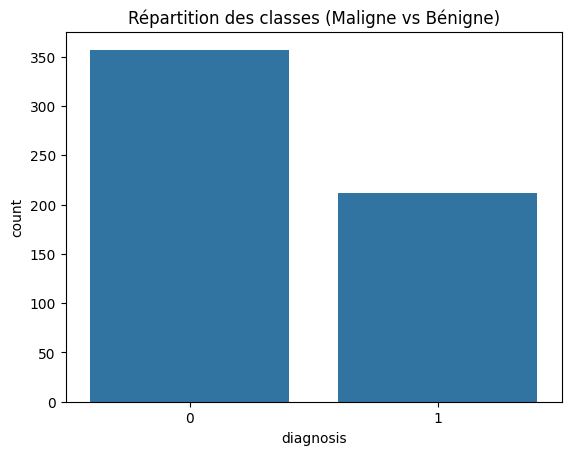

In [66]:
sns.countplot(x=df['diagnosis'])
plt.title("R√©partition des classes (Maligne vs B√©nigne)")
plt.show()

## Cr√©ation d'histogrammes pour chaque caract√©ristique du DataFrame

### Pourquoi ?

Les histogrammes sont un excellent moyen de visualiser la **r√©partition** des valeurs pour chaque caract√©ristique (ou colonne) de notre DataFrame. Cela nous aide √† comprendre la **distribution des donn√©es** (normalit√©, skewness, outliers, etc.) et √† prendre des d√©cisions inform√©es pour le pr√©-traitement des donn√©es, comme la normalisation ou la gestion des valeurs aberrantes.

### Objectifs

1. Cr√©er des histogrammes pour chaque colonne num√©rique du DataFrame.
2. Identifier les distributions des diff√©rentes caract√©ristiques.
3. Analyser la pr√©sence d'√©ventuelles anomalies, comme des valeurs extr√™mes ou une distribution non uniforme.




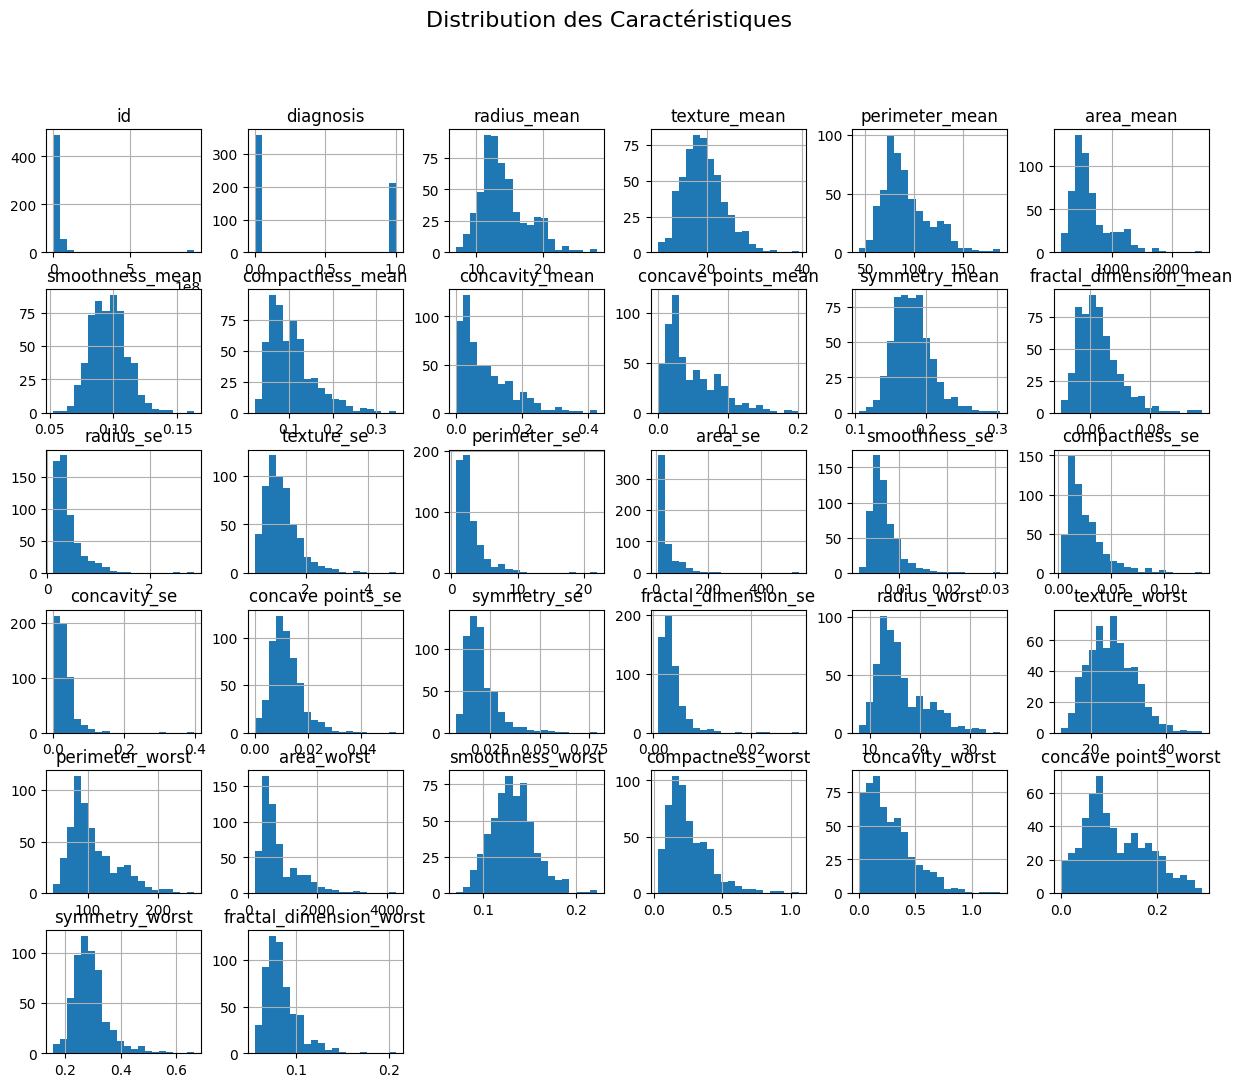

In [67]:
# figsize : d√©finit la taille de la figure (largeur, hauteur) en pouces
# bins : d√©finit le nombre de bacs (ou intervalles) dans l'histogramme
# color : d√©finit la couleur des barres de l'histogramme
df.hist(figsize=(15, 12), bins=20, color="#1f77b4")

# Ajouter un titre principal √† la figure
# fontsize : d√©finit la taille de la police du titre
plt.suptitle("Distribution des Caract√©ristiques", fontsize=16)

# Afficher la figure avec les histogrammes
plt.show()

## Calcul de la matrice de corr√©lation

### Pourquoi ?

La **matrice de corr√©lation** permet d'explorer les **relations lin√©aires** entre les variables num√©riques d'un DataFrame. Chaque valeur de la matrice repr√©sente le **coefficient de corr√©lation de Pearson** entre deux variables. Cette analyse est utile pour comprendre comment les variables sont li√©es entre elles et pour identifier d'√©ventuelles **multicolin√©arit√©s** avant l'entra√Ænement d'un mod√®le.

Les coefficients de corr√©lation varient entre :
- **1** : Corr√©lation parfaitement positive.
- **-1** : Corr√©lation parfaitement n√©gative.
- **0** : Aucune corr√©lation lin√©aire.

### Objectifs

1. Calculer la **matrice de corr√©lation** entre toutes les variables num√©riques du DataFrame.
2. Visualiser la matrice √† l'aide d'une carte de chaleur pour mieux comprendre les relations entre les variables.
3. Identifier les variables fortement corr√©l√©es qui pourraient n√©cessiter un traitement sp√©cifique.






In [70]:
df.corr()

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0.380676   
symmetry_se                   -0.081629  -0.072497         0.200

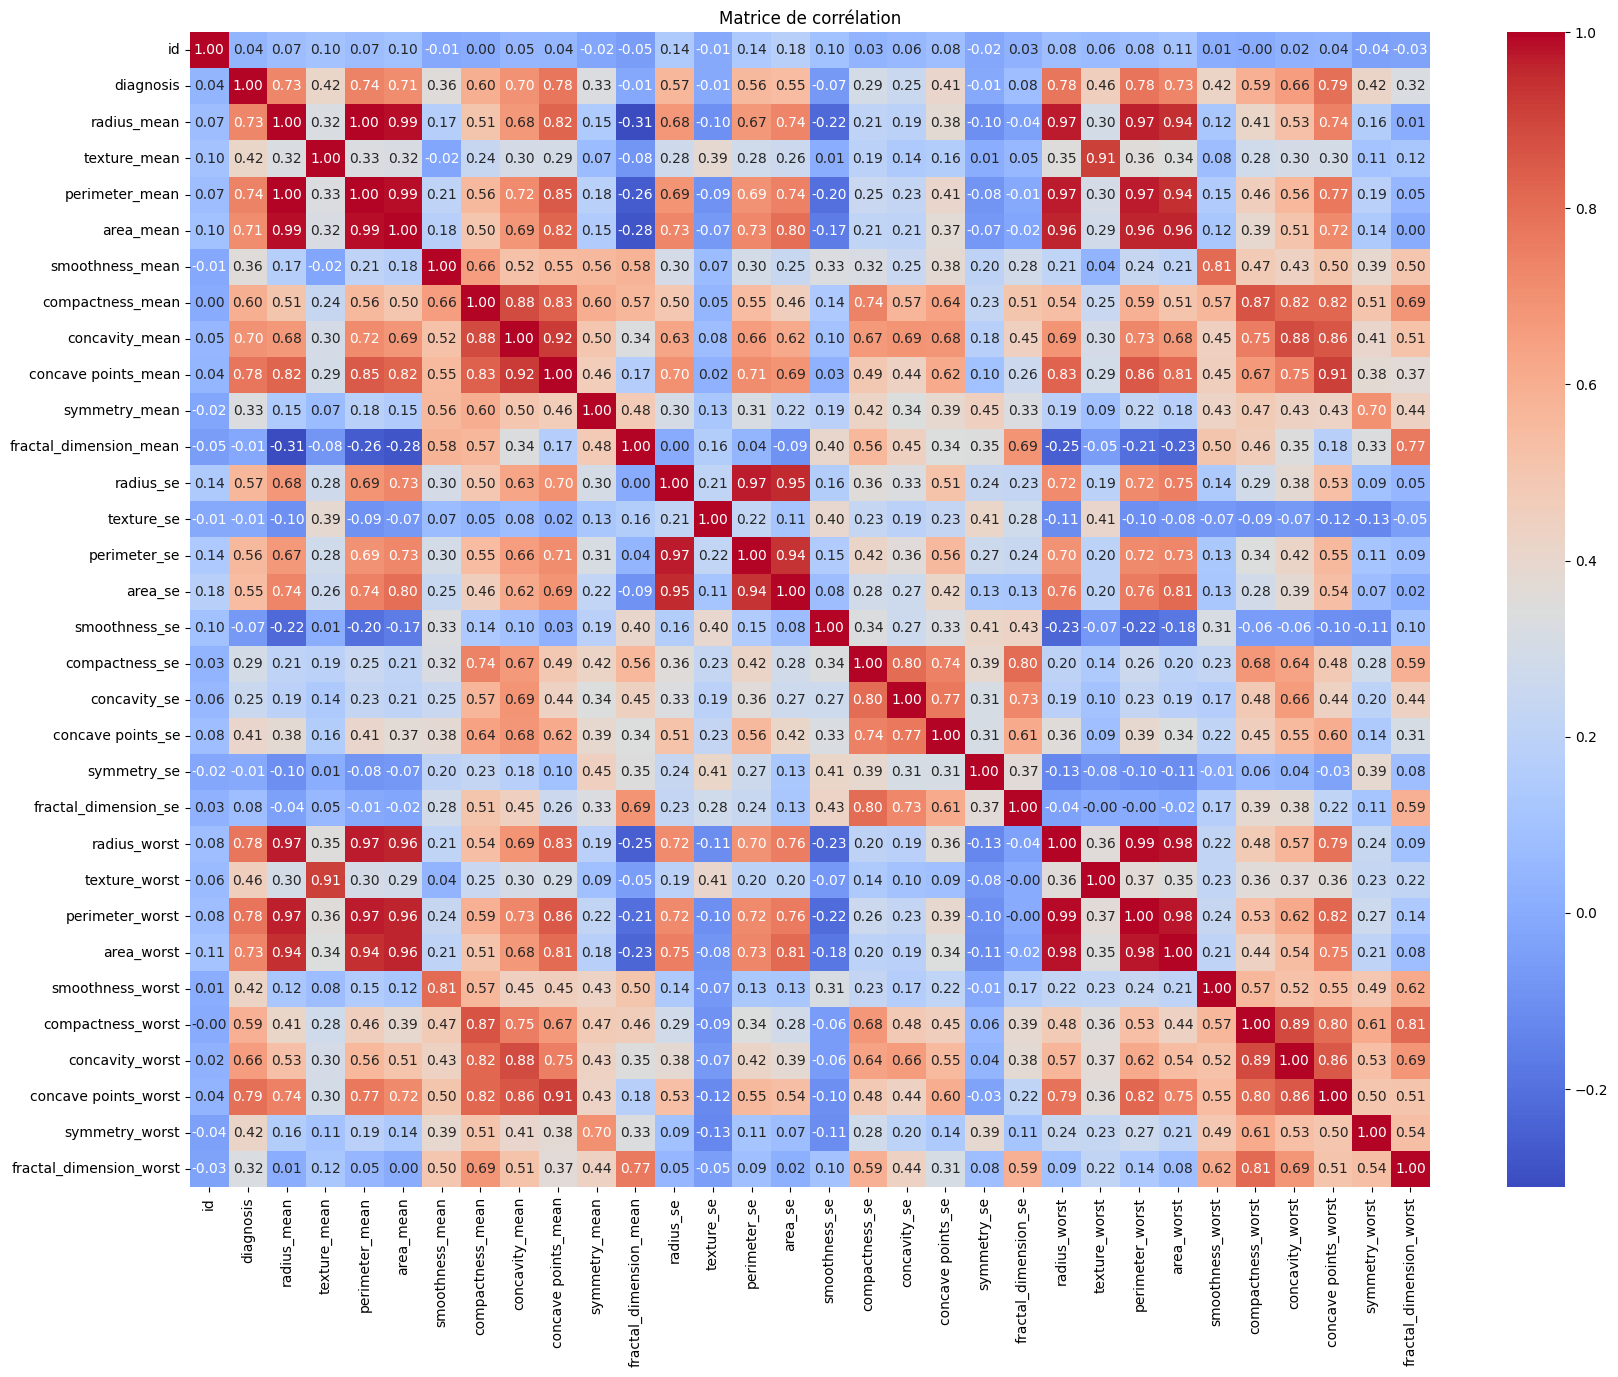

In [71]:
# La m√©thode corr() calcule la matrice de corr√©lation pour toutes les colonnes num√©riques du DataFrame.
corr_matrix = df.corr()

# Visualiser la matrice de corr√©lation
# Cr√©er une figure avec une taille sp√©cifique (largeur, hauteur) en pouces
plt.figure(figsize=(20, 15))

# Cr√©er une carte de chaleur (heatmap) pour visualiser la matrice de corr√©lation
# annot : indique si les valeurs de corr√©lation doivent √™tre affich√©es sur la carte
# fmt : format des annotations (ici, deux d√©cimales)
# cmap : palette de couleurs utilis√©e pour la carte de chaleur
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

# Ajouter un titre √† la carte de chaleur
plt.title('Matrice de corr√©lation')

# Afficher la carte de chaleur
plt.show()

## S√©lection de caract√©ristiques pour le Pairplot

### Pourquoi ?

Le **pairplot** est un graphique qui affiche toutes les combinaisons possibles de paires de variables num√©riques, sous forme de nuages de points (scatter plots). Cela permet de visualiser les relations entre ces caract√©ristiques, d'identifier des patterns, et de rep√©rer des tendances ou des corr√©lations. Cela est particuli√®rement utile pour l'exploration des donn√©es avant de construire un mod√®le.

En choisissant un sous-ensemble de caract√©ristiques pertinentes, nous pouvons mieux analyser les relations entre les variables sans √™tre submerg√©s par trop de donn√©es.

### Objectifs

1. S√©lectionner un sous-ensemble de caract√©ristiques pertinentes du DataFrame.
2. Cr√©er un **pairplot** pour visualiser les relations entre ces variables.
3. Identifier les **corr√©lations lin√©aires** et les **comportements similaires** entre les variables s√©lectionn√©es.

### M√©thodologie

Nous allons :
1. Choisir un sous-ensemble de variables num√©riques pertinentes √† analyser.
2. Cr√©er un **pairplot** pour ces caract√©ristiques afin de visualiser leurs relations.




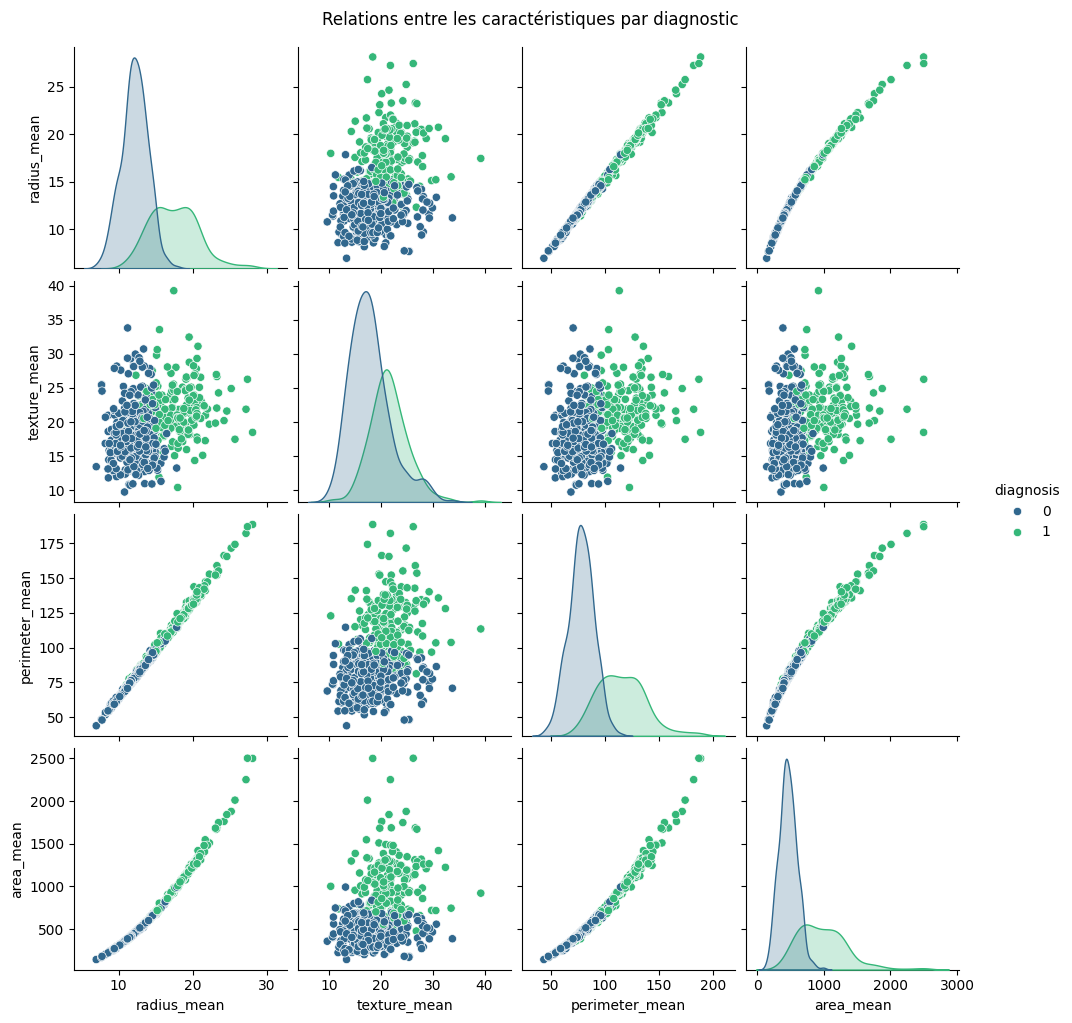

In [72]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# Cr√©er un pairplot pour visualiser les relations entre les caract√©ristiques
# 'hue' permet de colorer les points en fonction de la classe de diagnostic
# 'vars' sp√©cifie les colonnes √† inclure dans le pairplot
pairplot = sns.pairplot(df, hue='diagnosis', vars=features, palette='viridis')

# Ajouter un titre au graphique
plt.suptitle('Relations entre les caract√©ristiques par diagnostic', y=1.02)  # Ajuster la position du titre

# Afficher le graphique sans appel √† plt.tight_layout()
plt.show()

## Cr√©eation d'un Boxplot pour visualiser la distribution et les outliers des variables s√©lectionn√©es

### Pourquoi ?

Le **boxplot** (ou bo√Æte √† moustaches) est un excellent outil pour visualiser la **r√©partition des donn√©es** ainsi que les **outliers** (valeurs aberrantes). Il permet de r√©sumer les caract√©ristiques essentielles de la distribution d'une variable (m√©diane, quartiles, minimum et maximum), et de rep√©rer facilement les **valeurs extr√™mes**.

### Objectifs

1. Cr√©er un **boxplot** pour chaque variable s√©lectionn√©e afin de visualiser la distribution et d√©tecter les outliers.
2. Observer la **dispersion** des donn√©es et la **sym√©trie** de chaque variable.
3. Identifier les **valeurs aberrantes** qui peuvent affecter l'analyse des donn√©es ou la performance des mod√®les.






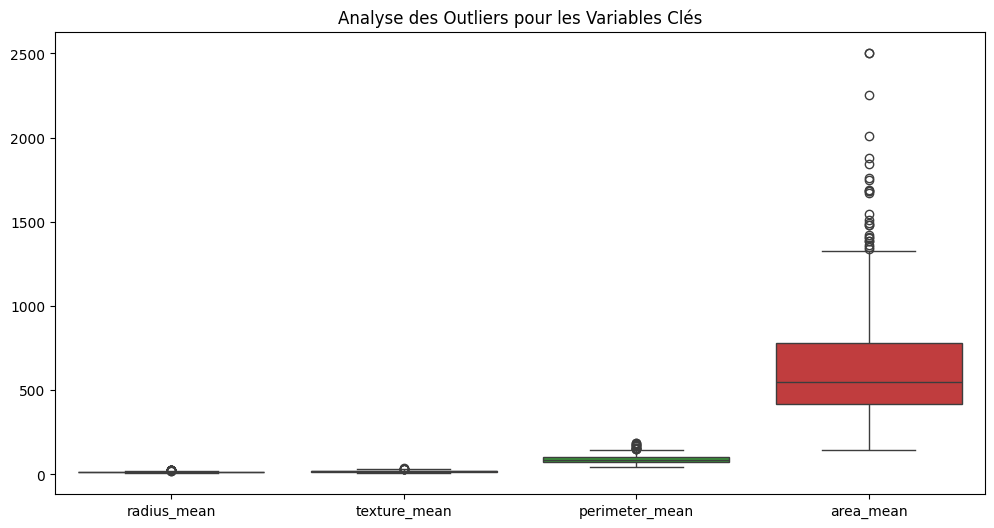

In [73]:
plt.figure(figsize=(12, 6))

# S√©lectionner les variables cl√©s pour le boxplot
variables_clefs = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

# Cr√©er un boxplot pour visualiser la distribution et les outliers des variables s√©lectionn√©es
sns.boxplot(data=df[variables_clefs])

# Ajouter un titre au graphique
plt.title("Analyse des Outliers pour les Variables Cl√©s")

# Afficher le graphique
plt.show()

## S√©lection des Caract√©ristiques (Feature Selection)

### Pourquoi ?

La **s√©lection des caract√©ristiques** est une √©tape essentielle dans le processus de pr√©paration des donn√©es pour la mod√©lisation. Elle consiste √† identifier et s√©lectionner les variables les plus pertinentes pour l'entra√Ænement du mod√®le. Cela permet de :
- R√©duire la **dimensionnalit√©** du jeu de donn√©es.
- √âviter le **surapprentissage** (overfitting) en supprimant les variables non pertinentes.
- Am√©liorer la **performance** et la **compr√©hension** du mod√®le.

Une bonne s√©lection des caract√©ristiques peut √©galement r√©duire le temps d'entra√Ænement et rendre le mod√®le plus interpr√©table.

### Objectifs

1. Identifier les variables les plus pertinentes pour la pr√©diction.
2. S√©lectionner les caract√©ristiques qui apportent le plus d'information au mod√®le.
3. √âliminer les caract√©ristiques redondantes ou non significatives.





In [74]:
# Suppression de la colonne 'id' car elle n'est pas pertinente pour l'analyse
df.drop('id', axis=1, inplace=True)

## Calcule la Matrice de Corr√©lation Absolue

### Pourquoi ?

La **matrice de corr√©lation** est un outil statistique qui permet de mesurer la relation entre plusieurs variables num√©riques. Elle donne un aper√ßu des corr√©lations (positives ou n√©gatives) entre les variables, ce qui est utile pour :
- Identifier les **relations lin√©aires** entre les variables.
- D√©cider quelles variables peuvent √™tre **√©limin√©es** si elles sont fortement corr√©l√©es.
- Comprendre comment les diff√©rentes caract√©ristiques interagissent dans le mod√®le.

Calculer la **matrice de corr√©lation absolue** permet de se concentrer sur la **force** des relations entre les variables, sans tenir compte de la direction (positive ou n√©gative).








In [75]:
#Calculer la matrice de corr√©lation absolue
corr_matrix = df.corr().abs()

# Cr√©er un masque pour la partie sup√©rieure de la matrice de corr√©lation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Appliquer le masque √† la matrice de corr√©lation pour ne garder que la partie inf√©rieure
tri_df = corr_matrix.mask(mask)

# Identifier les colonnes √† supprimer : celles ayant une corr√©lation sup√©rieure √† 0.92
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

# Supprimer les colonnes identifi√©es du DataFrame
df = df.drop(to_drop, axis=1)

# Afficher le nombre de caract√©ristiques restantes dans le DataFrame
print(df.shape[1])

23


In [76]:
df.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0          1         10.38          0.11840           0.27760   
1          1         17.77          0.08474           0.07864   
2          1         21.25          0.10960           0.15990   
3          1         20.38          0.14250           0.28390   
4          1         14.34          0.10030           0.13280   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2597                 0.09744      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   area_se  smoothness_se  ...  symmetry_se  fractal_dimension_se  \
0   153.40       0.006399  ...      0.03003              0.006193   
1    74.08       0.005225  ...      0.01389              0.003532   
2    94.03       0.006150  ...      0.02250              0.004571   
3    27.23       0.009110  ...      0.05963              0.009208   
4    94.44       0.011490  ...      0.01756              0.005115   

   texture_worst  area_worst  smoothness_worst  compactness_worst  \
0          17.33      2019.0            0.1622             0.6656   
1          23.41      1956.0            0.1238             0.1866   
2          25.53      1709.0            0.1444             0.4245   
3          26.50       567.7            0.2098             0.8663   
4          16.67      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 23 columns]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concave points_mean      569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   texture_se               569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

## S√©paration des Caract√©ristiques et de la Cible

### Pourquoi ?

Dans le cadre de l'entra√Ænement d'un mod√®le de machine learning, il est essentiel de **s√©parer les caract√©ristiques** (features) de la **cible** (target) pour pouvoir entra√Æner le mod√®le sur les **entr√©es** et √©valuer ses performances sur les **pr√©dictions**. Cette s√©paration permet √©galement de mieux comprendre la structure des donn√©es et de pr√©parer le mod√®le de mani√®re ad√©quate.

### Caract√©ristiques (`X`) :
Les caract√©ristiques sont les **entr√©es** du mod√®le. Elles repr√©sentent les variables d'entr√©e sur lesquelles le mod√®le va apprendre.

### Cible (`y`) :
La cible est la **variable √† pr√©dire** ou la **sortie**. C'est le r√©sultat que nous cherchons √† pr√©dire ou √† classer en fonction des caract√©ristiques.

### Objectifs

1. S√©parer les variables ind√©pendantes (**caract√©ristiques**) de la variable d√©pendante (**cible**).
2. Pr√©parer les donn√©es pour l'entra√Ænement du mod√®le.





In [78]:
# X contient toutes les caract√©ristiques du DataFrame, sauf la colonne 'diagnosis'
X = df.drop('diagnosis', axis=1)

# y contient la variable cible, qui est le diagnostic (benin ou malin)
y = df['diagnosis']

## Division des Donn√©es en Ensembles d'Entra√Ænement et de Test

### Pourquoi ?

Dans le cadre de la construction d'un mod√®le de machine learning, il est important de **diviser les donn√©es** en deux ensembles distincts :
1. **Ensemble d'entra√Ænement** : utilis√© pour entra√Æner le mod√®le.
2. **Ensemble de test** : utilis√© pour √©valuer la performance du mod√®le sur de nouvelles donn√©es, non vues lors de l'entra√Ænement.

Cette s√©paration permet de **v√©rifier la capacit√© de g√©n√©ralisation** du mod√®le et d'√©viter le **surapprentissage** (overfitting), o√π le mod√®le apprend trop bien les d√©tails de l'ensemble d'entra√Ænement, mais √©choue sur des donn√©es nouvelles.

### Objectifs

1. Diviser les donn√©es en deux ensembles : **Entra√Ænement** (train) et **Test** (test).
2. S'assurer que l'ensemble de test est **ind√©pendant** de l'ensemble d'entra√Ænement.
3. Utiliser les donn√©es d'entra√Ænement pour ajuster le mod√®le et les donn√©es de test pour **√©valuer sa performance**.

### M√©thodologie

Nous allons utiliser la fonction **train_test_split** de la biblioth√®que **scikit-learn** pour diviser le jeu de donn√©es en ensembles d'entra√Ænement et de test. Il est courant de r√©server **70-80% des donn√©es pour l'entra√Ænement** et **20-30% pour le test**.



In [79]:
from sklearn.model_selection import train_test_split
#Division des Donn√©es en Ensembles d'Entra√Ænement et de Test
# X_train et y_train contiendront respectivement les caract√©ristiques et la cible pour l'entra√Ænement
# X_test et y_test contiendront respectivement les caract√©ristiques et la cible pour le test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

## Standardisation des Donn√©es

### Pourquoi la Standardisation est-elle Importante ?

La **standardisation** est une √©tape essentielle dans le pr√©traitement des donn√©es, particuli√®rement pour les mod√®les de machine learning qui sont sensibles √† l'√©chelle des caract√©ristiques. Cela consiste √† mettre √† l'√©chelle les **caract√©ristiques** (features) de mani√®re √† ce qu'elles aient toutes des **moyennes √©gales √† 0** et des **√©carts-types √©gaux √† 1**. 

### Objectifs de la Standardisation :
1. **√âviter l'influence disproportionn√©e** des caract√©ristiques ayant des √©chelles tr√®s diff√©rentes.
2. Assurer que le mod√®le traite toutes les caract√©ristiques de mani√®re √©quivalente.
3. Am√©liorer la performance et la convergence des algorithmes de machine learning (notamment ceux qui utilisent des distances comme KNN, SVM, ou les r√©seaux de neurones).



In [80]:
#Scalping
from sklearn.preprocessing import StandardScaler
# Cr√©er un objet StandardScaler
scaler = StandardScaler()

In [81]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [82]:
X_train.shape

(455, 22)

## Entra√Ænement et s√©lection du meilleur mod√®le

#### Description de l'√©tape
Dans cette √©tape, vous avez entra√Æn√© votre jeu de donn√©es sur quatre mod√®les de machine learning :

1. R√©gression logistique : Un mod√®le lin√©aire simple, id√©al pour les probl√®mes de classification.
2. SVM (Support Vector Machine) : Un mod√®le puissant pour la classification, capable de g√©rer des fronti√®res de d√©cision complexes gr√¢ce √† l'utilisation de noyaux (kernels).
3. Random Forest : Un mod√®le ensembliste bas√© sur les arbres de d√©cision, qui combine plusieurs arbres pour am√©liorer la pr√©cision et r√©duire le surajustement.
4. Decision Tree : Un mod√®le simple et interpr√©table, qui divise les donn√©es en fonction de r√®gles d√©cisionnelles.
L'objectif est de comparer leurs performances afin de s√©lectionner le mod√®le qui offre les meilleurs r√©sultats pour votre probl√®me.

#### Importance de cette √©tape
1. Identifier le mod√®le optimal : Tous les mod√®les ne se comportent pas de la m√™me mani√®re sur un jeu de donn√©es donn√©. Cette √©tape permet de d√©terminer lequel est le plus performant.
2. Adapter le mod√®le aux donn√©es : Certains mod√®les sont mieux adapt√©s √† des donn√©es lin√©aires, tandis que d'autres excellent sur des donn√©es non lin√©aires ou complexes.
3. √âviter le surajustement (overfitting) : En testant plusieurs mod√®les, vous pouvez identifier ceux qui g√©n√©ralisent bien sur des donn√©es non vues, plut√¥t que de simplement m√©moriser les donn√©es d'entra√Ænement.
4. Optimiser les ressources : Choisir le meilleur mod√®le permet de gagner du temps et des ressources lors du d√©ploiement et de la maintenance.
5. Comprendre les donn√©es : La performance relative des mod√®les peut fournir des insights sur la nature des donn√©es (par exemple, si un mod√®le non lin√©aire performe mieux, cela sugg√®re que les donn√©es ont une structure complexe).

#### Difficult√©s ou d√©fis
1. Choix des m√©triques : Il est essentiel de choisir les bonnes m√©triques d'√©valuation (pr√©cision, rappel, F1-score, AUC-ROC, etc.) en fonction du probl√®me (classification binaire, multiclasse, d√©s√©quilibre des classes, etc.).
2. Temps de calcul : Certains mod√®les, comme les SVM ou les Random Forests, peuvent √™tre co√ªteux en termes de temps et de ressources, surtout sur de grands jeux de donn√©es.
3. Surajustement (overfitting) : Des mod√®les complexes comme les arbres de d√©cision ou les Random Forests peuvent surajuster les donn√©es d'entra√Ænement, ce qui nuit √† leur performance sur des donn√©es non vues.
4. Interpr√©tabilit√© : Certains mod√®les, comme les Random Forests ou les SVM, sont moins interpr√©tables que des mod√®les simples comme la r√©gression logistique ou les arbres de d√©cision.


In [83]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='lbfgs', max_iter=300)
model.fit(X_train_s,y_train)

LogisticRegression(max_iter=300)

In [84]:
y_pred = model.predict(X_test_s)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,model.predict(X_train_s)))
reg_acc=accuracy_score(y_test,model.predict(X_test_s))
print(reg_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.989010989010989
0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Explication d√©taill√©e de nos mod√®les et de l'utilisation de GridSearchCV

Nous avons impl√©ment√© quatre mod√®les de machine learning (**KNN**, **SVM**, **Decision Tree** et **Random Forest**) en utilisant **GridSearchCV** pour optimiser leurs hyperparam√®tres. Voici une explication d√©taill√©e de chaque mod√®le et de l'utilit√© de GridSearchCV dans notre code :

---

### 1. **K-Nearest Neighbors (KNN)**

#### Ce que nous avons fait :
- Nous avons d√©fini un mod√®le **KNeighborsClassifier**.
- Nous avons utilis√© **GridSearchCV** pour explorer une grille d'hyperparam√®tres, notamment :
  - **`n_neighbors`** : Nombre de voisins √† consid√©rer.
  - **`weights`** : Pond√©ration des voisins (`uniform` ou `distance`).
  - **`metric`** : Mesure de distance (`euclidean`, `manhattan`, `minkowski`).
  - **`algorithm`** : Algorithme de calcul des voisins (`auto`, `ball_tree`, `kd_tree`, `brute`).
  - **`leaf_size`** : Taille des feuilles pour les arbres `ball_tree` ou `kd_tree`.

#### Pourquoi avons-nous utilis√© GridSearchCV pour KNN ?
KNN est tr√®s sensible au choix de `n_neighbors` et de la m√©trique de distance. **GridSearchCV** nous a permis de trouver la meilleure combinaison de ces hyperparam√®tres pour maximiser la pr√©cision du mod√®le. Apr√®s avoir identifi√© les meilleurs hyperparam√®tres, nous avons entra√Æn√© un mod√®le optimis√© et √©valu√© sa performance sur l'ensemble de test.

---

### 2. **Support Vector Machine (SVM)**

#### Ce que nous avons fait :
- Nous avons d√©fini un mod√®le **SVC** (Support Vector Classifier).
- Nous avons utilis√© **GridSearchCV** pour explorer une grille d'hyperparam√®tres, notamment :
  - **`C`** : Param√®tre de r√©gularisation.
  - **`gamma`** : Param√®tre du noyau (surtout pour `rbf`).
  - **`kernel`** : Fonction de noyau (`linear`, `poly`, `rbf`, `sigmoid`).

#### Pourquoi avons-nous utilis√© GridSearchCV pour SVM ?
SVM est un mod√®le puissant, mais ses performances d√©pendent fortement des hyperparam√®tres comme `C`, `gamma` et `kernel`. **GridSearchCV** nous a aid√©s √† trouver la configuration optimale pour maximiser la s√©paration des classes. Apr√®s avoir identifi√© les meilleurs hyperparam√®tres, nous avons √©valu√© le mod√®le sur l'ensemble de test.

---

### 3. **Decision Tree**

#### Ce que nous avons fait :
- Nous avons d√©fini un mod√®le **DecisionTreeClassifier**.
- Nous avons utilis√© **GridSearchCV** pour explorer une grille d'hyperparam√®tres, notamment :
  - **`criterion`** : Crit√®re de division (`gini` ou `entropy`).
  - **`max_depth`** : Profondeur maximale de l'arbre.
  - **`min_samples_split`** : Nombre minimal d'√©chantillons requis pour diviser un n≈ìud.
  - **`min_samples_leaf`** : Nombre minimal d'√©chantillons requis pour √™tre une feuille.

#### Pourquoi avons-nous utilis√© GridSearchCV pour Decision Tree ?
Les arbres de d√©cision ont tendance √† surajuster si leurs hyperparam√®tres ne sont pas bien r√©gl√©s. **GridSearchCV** nous a aid√©s √† trouver une configuration qui √©quilibre la complexit√© et la performance. Apr√®s avoir identifi√© les meilleurs hyperparam√®tres, nous avons √©valu√© le mod√®le sur l'ensemble de test.

---

### 4. **Random Forest**

#### Ce que nous avons fait :
- Nous avons d√©fini un mod√®le **RandomForestClassifier**.
- Nous avons utilis√© **GridSearchCV** pour explorer une grille d'hyperparam√®tres, notamment :
  - **`n_estimators`** : Nombre d'arbres dans la for√™t.
  - **`criterion`** : Crit√®re de division (`gini` ou `entropy`).
  - **`max_depth`** : Profondeur maximale des arbres.
  - **`min_samples_split`** : Nombre minimal d'√©chantillons requis pour diviser un n≈ìud.
  - **`min_samples_leaf`** : Nombre minimal d'√©chantillons requis pour √™tre une feuille.

#### Pourquoi avons-nous utilis√© GridSearchCV pour Random Forest ?
Random Forest est un mod√®le robuste, mais ses performances d√©pendent de la configuration des hyperparam√®tres. **GridSearchCV** nous a permis de trouver le bon √©quilibre entre complexit√© et g√©n√©ralisation. Apr√®s avoir identifi√© les meilleurs hyperparam√®tres, nous avons √©valu√© le mod√®le sur l'ensemble de test.

---

### En r√©sum√© :
- **KNN** : Nous avons optimis√© `n_neighbors`, `weights`, `metric`, `algorithm` et `leaf_size` pour am√©liorer la pr√©cision des pr√©dictions.
- **SVM** : Nous avons recherch√© les meilleurs `C`, `gamma` et `kernel` pour maximiser la s√©paration des classes.
- **Decision Tree** : Nous avons ajust√© `criterion`, `max_depth`, `min_samples_split` et `min_samples_leaf` pour √©viter le surajustement.
- **Random Forest** : Nous avons optimis√© `n_estimators`, `criterion`, `max_depth`, `min_samples_split` et `min_samples_leaf` pour √©quilibrer stabilit√© et performance.

En utilisant **GridSearchCV**, nous avons syst√©matiquement explor√© ces hyperparam√®tres pour chaque mod√®le, garantissant ainsi des performances optimales et une meilleure g√©n√©ralisation. Cela nous a permis de construire des mod√®les robustes, pr√™ts pour le d√©ploiement.





### 1. **K-Nearest Neighbors (KNN)**

In [96]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# D√©finir le mod√®le
model_knn = KNeighborsClassifier()

# D√©finir la grille des hyperparam√®tres
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50]
}

# Configurer la recherche en grille
grid_search = GridSearchCV(model_knn, param_grid, cv=5)

# Ex√©cuter la recherche en grille
grid_search.fit(X_train_s, y_train)

# Meilleurs hyperparam√®tres
print("Meilleurs hyperparam√®tres :", grid_search.best_params_)

Meilleurs hyperparam√®tres : {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [97]:
# Supposons que 'grid_search' soit l'objet GridSearchCV d√©j√† ajust√©
best_params = grid_search.best_params_

# Cr√©er un nouveau mod√®le KNeighborsClassifier avec les meilleurs hyperparam√®tres
model_knn_optimized = KNeighborsClassifier(**best_params)

# Entra√Æner le mod√®le optimis√© sur l'ensemble de donn√©es d'entra√Ænement complet
model_knn_optimized.fit(X_train_s, y_train)

# √âvaluer le mod√®le optimis√© sur l'ensemble de test
accuracy_knn = model_knn_optimized.score(X_test_s, y_test)
print("Pr√©cision du mod√®le optimis√© :", accuracy_knn)

Pr√©cision du mod√®le optimis√© : 0.9736842105263158


### 2. **Support Vector Machine (SVM)**

In [88]:
#svc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# D√©finir le mod√®le
model_svm = SVC(probability=True)

# D√©finir la grille des hyperparam√®tres
param_grid = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20],
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Configurer la recherche en grille avec parall√©lisation
grid_search = GridSearchCV(model_svm, param_grid, cv=5, n_jobs=-1)

# Ex√©cuter la recherche en grille
grid_search.fit(X_train_s, y_train)

# Meilleurs hyperparam√®tres et score en validation crois√©e
print("Meilleurs hyperparam√®tres :", grid_search.best_params_)
print("Score moyen en validation crois√©e :", grid_search.best_score_)

# √âvaluer le mod√®le avec les meilleurs hyperparam√®tres sur les donn√©es de test
best_model_svm = grid_search.best_estimator_
y_pred = best_model_svm.predict(X_test_s)
model_svm_acc=accuracy_score(y_test, y_pred)
print("Accuracy sur le test set :", accuracy_score(y_test, y_pred))


Meilleurs hyperparam√®tres : {'C': 15, 'gamma': 0.01}
Score moyen en validation crois√©e : 0.9802197802197803
Accuracy sur le test set : 0.9824561403508771


In [89]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

### 3. **Decision Tree**

In [ ]:
#DT
from sklearn.tree import DecisionTreeClassifier

# D√©finir le mod√®le
model_dt = DecisionTreeClassifier()

# D√©finir la grille des hyperparam√®tres
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Configurer la recherche en grille avec validation crois√©e
grid_search = GridSearchCV(model_dt, param_grid, cv=5, n_jobs=-1)

# Ex√©cuter la recherche en grille
grid_search.fit(X_train_s, y_train)

# Meilleurs hyperparam√®tres et score moyen
print("Meilleurs hyperparam√®tres :", grid_search.best_params_)
print("Score moyen en validation crois√©e :", grid_search.best_score_)

# √âvaluer le mod√®le sur les donn√©es de test
best_model_dt = grid_search.best_estimator_
y_pred = best_model_dt.predict(X_test_s)
model_dt_acc=accuracy_score(y_test, y_pred)
print("Accuracy sur le test set :", accuracy_score(y_test, y_pred))

Meilleurs hyperparam√®tres : {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Score moyen en validation crois√©e : 0.9340659340659341
Accuracy sur le test set : 0.9649122807017544


### 4. **Random Forest**

In [93]:
#RFC
from sklearn.ensemble import RandomForestClassifier


# D√©finir le mod√®le
model_rf = RandomForestClassifier()

# D√©finir la grille des hyperparam√®tres
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la for√™t
    'criterion': ['gini', 'entropy'],  # Mesure d'impuret√©
    'max_depth': [None, 10, 20, 50],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre min d'√©chantillons pour diviser un n≈ìud
    'min_samples_leaf': [1, 2, 5]  # Nombre min d'√©chantillons dans une feuille
}

# Configurer la recherche en grille avec validation crois√©e
grid_search = GridSearchCV(model_rf, param_grid, cv=5, n_jobs=-1)

# Ex√©cuter la recherche en grille
grid_search.fit(X_train_s, y_train)

# Meilleurs hyperparam√®tres et score moyen
print("Meilleurs hyperparam√®tres :", grid_search.best_params_)
print("Score moyen en validation crois√©e :", grid_search.best_score_)

# √âvaluer le mod√®le sur les donn√©es de test
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(X_test_s)
model_rf_acc=accuracy_score(y_test, y_pred)
print("Accuracy sur le test set :", accuracy_score(y_test, y_pred))

Meilleurs hyperparam√®tres : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Score moyen en validation crois√©e : 0.9714285714285715
Accuracy sur le test set : 0.9736842105263158


### Comparaison des performances des mod√®les

In [98]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [100*round(reg_acc,4), 100*round(accuracy_knn,4), 100*round(model_svm_acc,4), 100*round(model_dt_acc,4), 100*round(model_rf_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
2                       SVM  98.25
4  Random Forest Classifier  97.37
1                       KNN  97.37
0       Logistic Regression  96.49
3  Decision Tree Classifier  96.49

## √âvaluation des Mod√®les avec la Courbe ROC

L'√©valuation des mod√®les de classification peut √™tre r√©alis√©e √† l'aide de la **courbe ROC** (Receiver Operating Characteristic), qui permet d'analyser la performance des diff√©rents mod√®les en termes de deux m√©triques essentielles :

- **Sensibilit√©** (Taux de Vrais Positifs) : La proportion des instances positives correctement identifi√©es par le mod√®le.
- **Sp√©cificit√©** (Taux de Faux Positifs) : La proportion des instances n√©gatives correctement identifi√©es par le mod√®le.

### Processus

1. **Calcul de la courbe ROC** : 
   Pour chaque mod√®le, nous tra√ßons la courbe ROC en calculant la **taux de faux positifs** (FPR) et le **taux de vrais positifs** (TPR) √† diff√©rents seuils de classification.

2. **Calcul de l'Aire sous la Courbe (AUC)** :
   L'AUC (Area Under the Curve) mesure la qualit√© globale du mod√®le. Un AUC proche de 1 signifie un mod√®le performant, tandis qu'un AUC proche de 0.5 indique un mod√®le al√©atoire.

3. **Comparaison des mod√®les** : 
   Plusieurs mod√®les peuvent √™tre compar√©s sur la m√™me courbe ROC. Le mod√®le qui montre une plus grande distance entre la courbe et la ligne de r√©f√©rence (diagonale rouge) sera consid√©r√© comme meilleur.

### Objectif

L'objectif de cette √©tape est de visualiser et de comparer les performances des diff√©rents mod√®les (par exemple : **R√©gression Logistique**, **Arbre de D√©cision**, **SVM**, **KNN**, **For√™t Al√©atoire**) pour d√©terminer celui qui offre le meilleur compromis entre **sensibilit√©** et **sp√©cificit√©**.




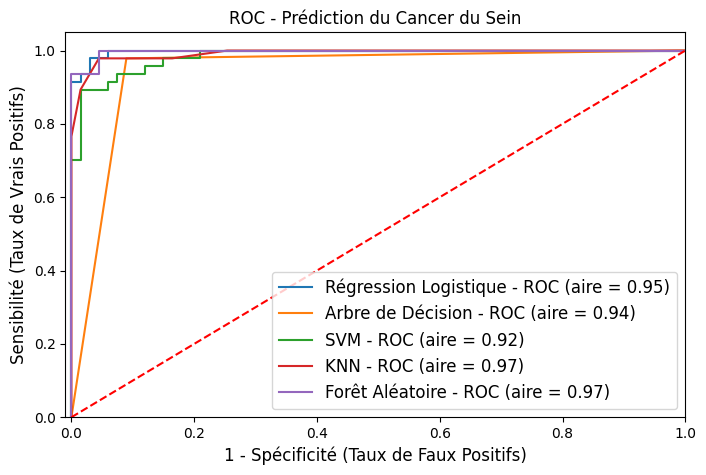

In [99]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.figure(figsize=(8,5))

models = [
    {
        'label': 'R√©gression Logistique',
        'model': model,
    },
    {
        'label': 'Arbre de D√©cision',
        'model': model_dt,
    },
    {
        'label': 'SVM',
        'model': model_svm,
    },
    {
        'label': 'KNN',
        'model': model_knn,
    },
    {
        'label': 'For√™t Al√©atoire',
        'model': model_rf,
    },
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcul de la courbe ROC
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    
    # Trac√© de la courbe ROC
    plt.plot(fpr1, tpr1, label='%s - ROC (aire = %0.2f)' % (m['label'], auc))

# Ligne de r√©f√©rence
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Sp√©cificit√© (Taux de Faux Positifs)', fontsize=12)
plt.ylabel('Sensibilit√© (Taux de Vrais Positifs)', fontsize=12)
plt.title('ROC - Pr√©diction du Cancer du Sein', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Affichage du graphe
plt.show()


## √âvaluation des mod√®les √† l'aide de la pr√©cision et de l'AUC-ROC

Dans cette √©tape, nous comparons plusieurs mod√®les de machine learning en utilisant deux m√©triques essentielles :

### 1. **Pr√©cision (Accuracy)**
La pr√©cision mesure le pourcentage de pr√©dictions correctes r√©alis√©es par un mod√®le. Elle est d√©finie comme le rapport du nombre de pr√©dictions correctes sur le nombre total de pr√©dictions. C'est une m√©trique simple mais puissante pour √©valuer l'efficacit√© d'un mod√®le.

### 2. **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
L'AUC-ROC est une m√©trique utilis√©e pour √©valuer la capacit√© d'un mod√®le √† distinguer entre les classes positives et n√©gatives. 
- **ROC (Receiver Operating Characteristic)** est une courbe qui trace le taux de vrais positifs (sensibilit√©) en fonction du taux de faux positifs (1 - sp√©cificit√©).
- **AUC** (Area Under the Curve) repr√©sente l'aire sous cette courbe. Une AUC de 1 signifie un mod√®le parfait, tandis qu'une AUC de 0,5 indique un mod√®le sans pouvoir discriminant.

### Objectif
Cette √©tape consiste √† entra√Æner plusieurs mod√®les (R√©gression Logistique, Arbre de D√©cision, SVM, KNN, For√™t Al√©atoire) et √† √©valuer leur performance sur un ensemble de test. Nous calculons la pr√©cision et l'AUC-ROC de chaque mod√®le, puis nous comparons les r√©sultats √† l'aide d'un graphique.

### R√©sultats
Les r√©sultats sont pr√©sent√©s sous forme de barres repr√©sentant la pr√©cision (accuracy) et l'AUC-ROC des diff√©rents mod√®les. Cela nous permet d'identifier le mod√®le le plus performant pour la t√¢che de pr√©diction.




Pr√©cision des mod√®les : [96.49, 96.49, 98.25, 97.37, 97.37]
Scores ROC des mod√®les : [np.float64(99.63), np.float64(92.97), np.float64(98.41), np.float64(99.21), np.float64(99.9)]


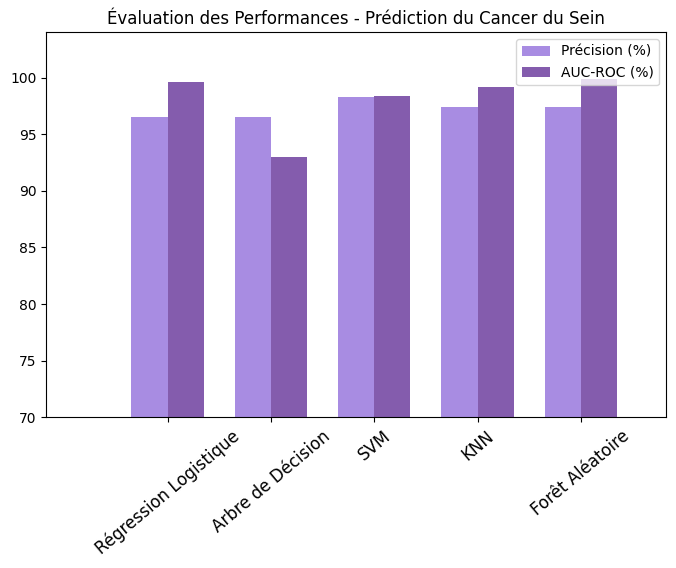

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Liste des mod√®les (Assurez-vous qu'ils sont bien d√©finis)
models = [
    {'label': 'R√©gression Logistique', 'model': model},
    {'label': 'Arbre de D√©cision', 'model': model_dt},
    {'label': 'SVM', 'model': model_svm},
    {'label': 'KNN', 'model': model_knn},
    {'label': 'For√™t Al√©atoire', 'model': model_rf},
]

# Liste des pr√©cisions (accuracy)
means_accuracy = [
    100 * round(reg_acc, 4),
    100 * round(model_dt_acc, 4),
    100 * round(model_svm_acc, 4),
    100 * round(accuracy_knn, 4),
    100 * round(model_rf_acc, 4),
]

# Calcul des scores AUC-ROC
means_roc = []
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # V√©rifier si le mod√®le supporte predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = metrics.roc_auc_score(y_test, y_prob)
    else:
        auc = metrics.roc_auc_score(y_test, y_pred)  # Pour les mod√®les sans `predict_proba`

    means_roc.append(100 * round(auc, 4))

# Affichage des r√©sultats
print("Pr√©cision des mod√®les :", means_accuracy)
print("Scores ROC des mod√®les :", means_roc)

# Cr√©ation du graphique comparatif
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots(figsize=(8, 5))

# Barres pour l'accuracy
rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Pr√©cision (%)')

# Barres pour le score AUC-ROC
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='AUC-ROC (%)')

plt.xlim([-1, n_groups])
plt.ylim([70, 104])

plt.title('√âvaluation des Performances - Pr√©diction du Cancer du Sein', fontsize=12)
plt.xticks(index + bar_width / 2, [m['label'] for m in models], rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)

# Affichage du graphique
plt.show()


In [ ]:
import joblib

# Sauvegarder le mod√®le entra√Æn√©
joblib.dump(model_svm, 'modell_svm.pkl')

['scaler.pkl']